In [4]:
# Histogram, Skewness & Kurtosis 

In [5]:
from QQUnivariate import QQUnivariate
import pandas as pd
import numpy as np

In [6]:
dataset=pd.read_csv("Placement.csv")

In [7]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Split the data columns to  Qunatitative  & Qulitative by calling a function

In [8]:
#Call the  function to  split the columns  by  data type
QQUnivariate.quanQual(dataset)

(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'],
 ['gender',
  'ssc_b',
  'hsc_b',
  'hsc_s',
  'degree_t',
  'workex',
  'specialisation',
  'status'])

In [9]:
Quan1,Qual1=QQUnivariate.quanQual(dataset)

In [10]:
Quan1

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# IQR - Inter Quarter Range

In [11]:
#Callthe function to calculate the unvariate column values
descriptive=QQUnivariate.Univariate(Quan1,dataset)

In [12]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67,66,66,72,62,288655
Median,108,67,65,66,71,62,265000
Mode,1,62,63,65,60,56.7,300000
Q1:25%,54.5,60.6,60.9,61,60,57.945,240000
Q2:50%,108,67,65,66,71,62,265000
Q3:75%,161.5,75.7,73,72,83.5,66.255,300000
Q4:100%,215,89.4,97.7,91,98,77.89,940000
99%,212.86,87,91.86,83.86,97,76.1142,NaN
IQR,107,15.1,12.1,11,23.5,8.31,60000
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000


# Identify the Outliers   data columns

In [13]:
# Call the function to identify the  outliers
QQUnivariate.LesserGreater(Quan1,descriptive)

(['hsc_p'], ['hsc_p', 'degree_p', 'salary'])

In [14]:
Lesser,Greater = QQUnivariate.LesserGreater(Quan1,descriptive)

In [16]:
Lesser

['hsc_p']

In [17]:
Greater

['hsc_p', 'degree_p', 'salary']

# Replacing Outliers

In [18]:
for columnName in Lesser:
    dataset[columnName][dataset[columnName] < descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
    
for columnName in Greater:
     dataset[columnName][dataset[columnName] > descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"] 


C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Validate the Outlier column values are updated  with in the range

In [19]:
# Call the function to check the outlier column  values are replaced
descriptive=QQUnivariate.Univariate(Quan1,dataset)

In [20]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67,66,66,72,62,277649
Median,108,67,65,66,71,62,265000
Mode,1,62,63,65,60,56.7,300000
Q1:25%,54.5,60.6,60.9,61,60,57.945,240000
Q2:50%,108,67,65,66,71,62,265000
Q3:75%,161.5,75.7,73,72,83.5,66.255,300000
Q4:100%,215,89.4,91.15,88.5,98,77.89,390000
99%,212.86,87,91.129,83.86,97,76.1142,NaN
IQR,107,15.1,12.1,11,23.5,8.31,60000
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000


In [21]:
Check_Lesser,Check_Greater=QQUnivariate.LesserGreater(Quan1,descriptive)

In [22]:
Check_Lesser

[]

In [23]:
Check_Greater

[]

# Frequecny - Histogram

In [24]:
#Call the  freTable function 
import pandas as pd
freqTable=QQUnivariate.freqTable("salary",dataset)

In [25]:
freqTable

,Unique_Values,Frequency,Relative_Frequency,Cumulative_Sum
0,300000.0,22,0.213592,0.213592
1,250000.0,18,0.174757,0.388350
2,390000.0,15,0.145631,0.533981
3,240000.0,15,0.145631,0.679612
4,260000.0,7,0.067961,0.747573
5,200000.0,6,0.058252,0.805825
6,360000.0,6,0.058252,0.864078
7,265000.0,6,0.058252,0.922330
8,220000.0,5,0.048544,0.970874
9,275000.0,5,0.048544,1.019417


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

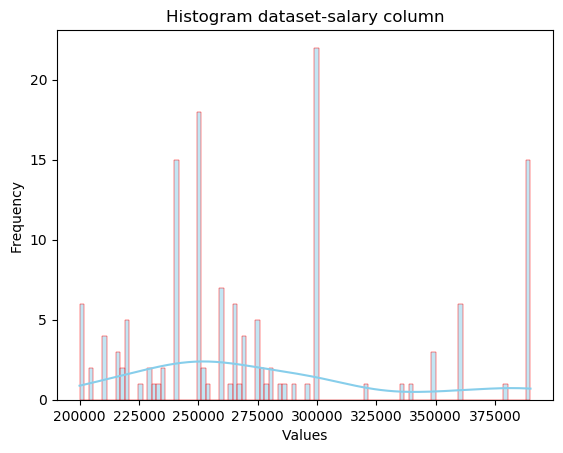

In [27]:
sns.histplot(dataset['salary'],bins=100, kde=True, color='skyblue', edgecolor='red') # Customize bins and colors
plt.xlabel('Values') # Label for X-axis
plt.ylabel('Frequency') # Label for Y-axis
plt.title('Histogram dataset-salary column') # Title of the plot
plt.show() # Display the plot

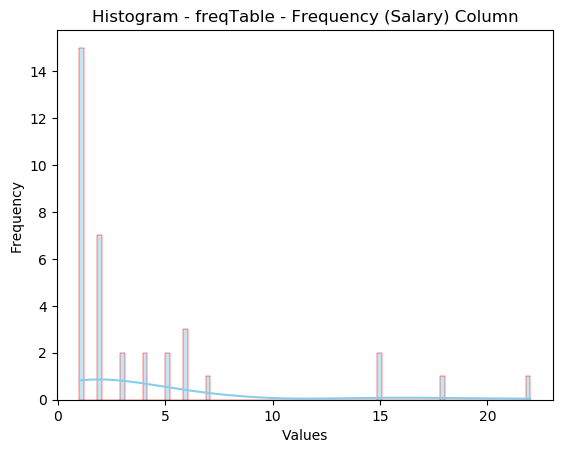

In [28]:
sns.histplot(freqTable['Frequency'],bins=100, kde=True, color='skyblue', edgecolor='red') # Customize bins and colors
plt.xlabel('Values') # Label for X-axis
plt.ylabel('Frequency') # Label for Y-axis
plt.title('Histogram - freqTable - Frequency (Salary) Column') # Title of the plot
plt.show() # Display the plot

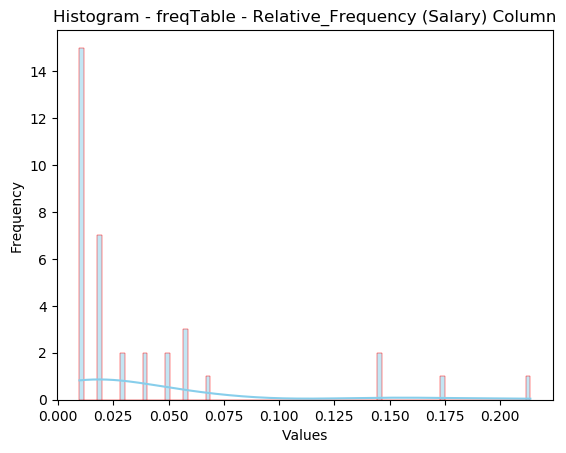

In [29]:
sns.histplot(freqTable['Relative_Frequency'],bins=100, kde=True, color='skyblue', edgecolor='red') # Customize bins and colors
plt.xlabel('Values') # Label for X-axis
plt.ylabel('Frequency') # Label for Y-axis
plt.title('Histogram - freqTable - Relative_Frequency (Salary) Column') # Title of the plot
plt.show() # Display the plot

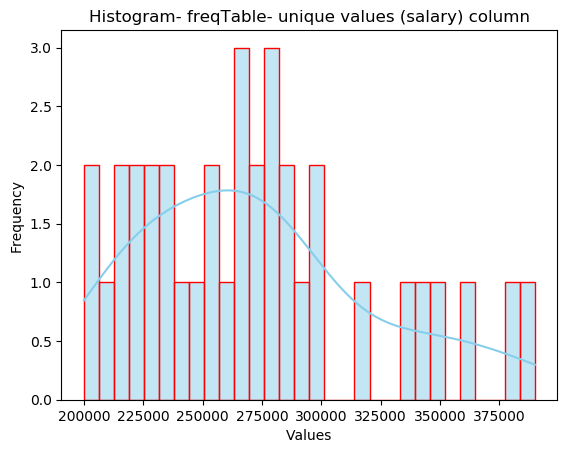

In [30]:
sns.histplot(freqTable ['Unique_Values'],bins=30, kde=True, color='skyblue', edgecolor='red') # Customize bins and colors
plt.xlabel('Values') # Label for X-axis
plt.ylabel('Frequency') # Label for Y-axis
plt.title('Histogram- freqTable- unique values (salary) column') # Title of the plot
plt.show() # Display the plot

# Skewness - Kurtosis

In [31]:
dir (dataset["ssc_p"])

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__p

In [32]:
dataset["ssc_p"].skew()

-0.13264949031456927

In [33]:
dataset["ssc_p"].kurtosis()

-0.6075102066986688

In [34]:
from QQUnivariate import QQUnivariate

In [35]:
#Callthe function to calculate the unvariate column values
descriptive=QQUnivariate.Univariate(Quan1,dataset)

In [36]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67,66,66,72,62,277649
Median,108,67,65,66,71,62,265000
Mode,1,62,63,65,60,56.7,300000
Q1:25%,54.5,60.6,60.9,61,60,57.945,240000
Q2:50%,108,67,65,66,71,62,265000
Q3:75%,161.5,75.7,73,72,83.5,66.255,300000
Q4:100%,215,89.4,91.15,88.5,98,77.89,390000
99%,212.86,87,91.129,83.86,97,76.1142,NaN
IQR,107,15.1,12.1,11,23.5,8.31,60000
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000
